In [4]:
import pandas as pd

df_students = pd.read_csv('grades.csv', delimiter = ',', header='infer')
#rimuovo righe con dati mancanti
df_students = df_students.dropna(axis=0, how='any')
#calcolo gli studenti che hanno passato l'esame (60 come votazione minima)
passes = pd.Series(df_students['Grade']>=60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


# visualizzare i dati con matplotlib

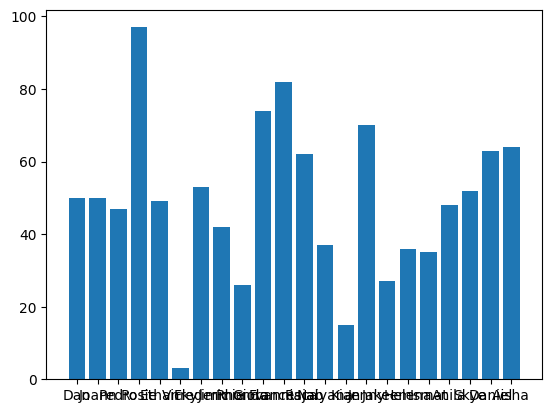

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(x=df_students.Name, height=df_students.Grade)
plt.show()


miglioramenti al grafico

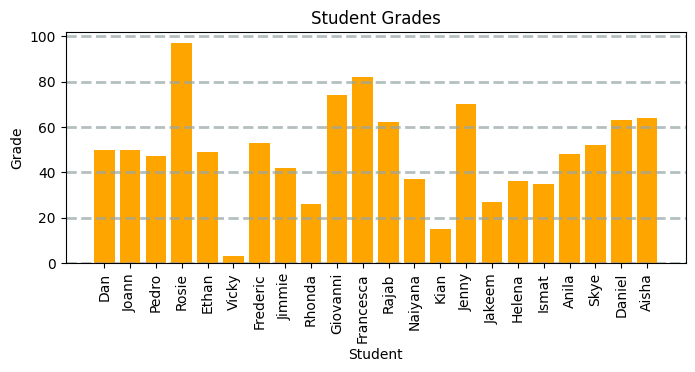

In [7]:
fig = plt.figure(figsize=(8,3))
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

creo dei subplot nella stessa figura

C:\Users\ricca\AppData\Local\Temp\ipykernel_18924\1398214638.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\ricca\AppData\Local\Temp\ipykernel_18924\1398214638.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


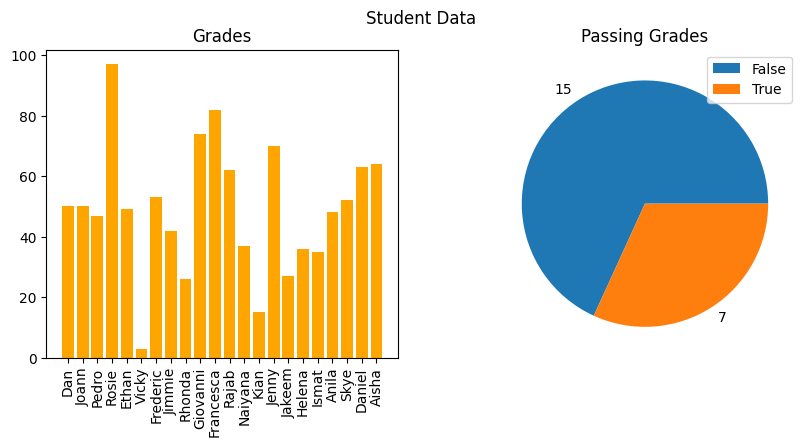

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
# Creare un grafico a barre del nome - voto.
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)
# Creare un grafico a torta del conteggio degli studenti che hanno passato l'esame.
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

fig.suptitle('Student Data')

fig.show()

il DataFrame fornisce i propri metodi per tracciare i dati, come mostrato nell'esempio seguente per tracciare un grafico a barre delle ore di studio.

<AxesSubplot: xlabel='Name'>

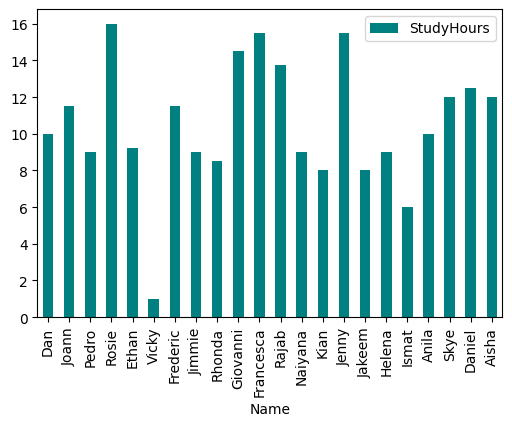

In [9]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

alcune statistiche

Minimo:  3.0 
Massimo:  97.0 
Media:  49.18181818181818 
Mediana:  49.5 
Moda:  50.0


C:\Users\ricca\AppData\Local\Temp\ipykernel_18924\1890138264.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


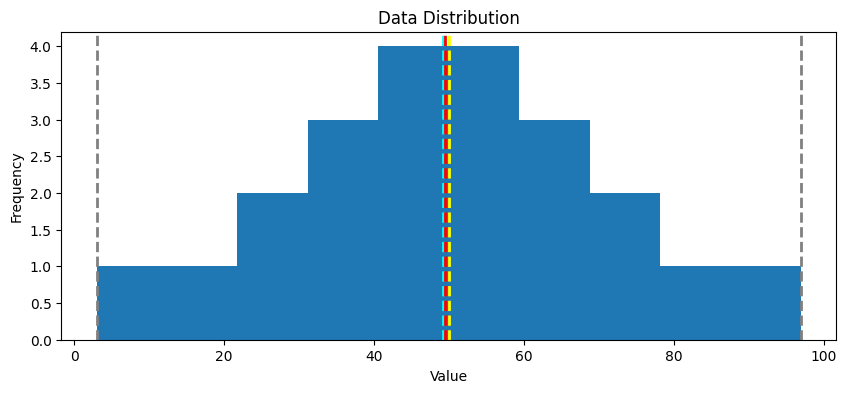

In [12]:
# Gvariabile da esaminare
var = df_students['Grade']

# statistiche
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print("Minimo: ", min_val, "\nMassimo: ", max_val, "\nMedia: ", mean_val, "\nMediana: ", med_val, "\nModa: ", mod_val)

fig = plt.figure(figsize=(10,4))

# Istogramma voto - frequenza della variabile presa in esame
plt.hist(var)

# plot statistiche
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Titolo e nomi assi
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

boxplot

C:\Users\ricca\AppData\Local\Temp\ipykernel_18924\3196794014.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


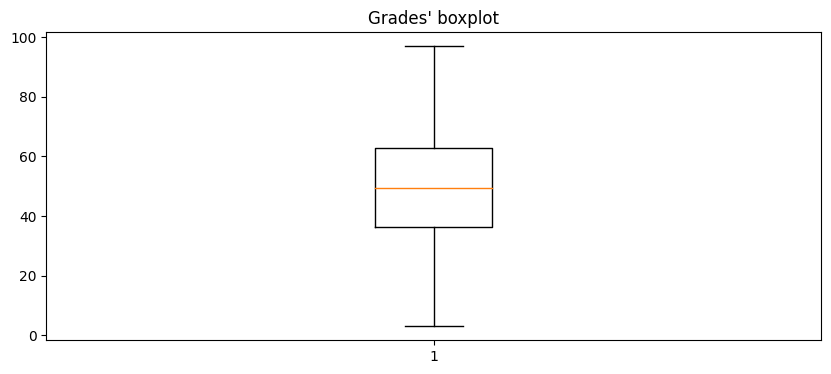

In [13]:
var = df_students['Grade']

fig = plt.figure(figsize=(10, 4))
plt.boxplot(var)
plt.title("Grades' boxplot")
fig.show()


metto tutto insieme in un'unica funzione

Minimo:  3.0 
Massimo:  97.0 
Media:  49.18181818181818 
Mediana:  49.5 
Moda:  50.0


C:\Users\ricca\AppData\Local\Temp\ipykernel_18924\503473827.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


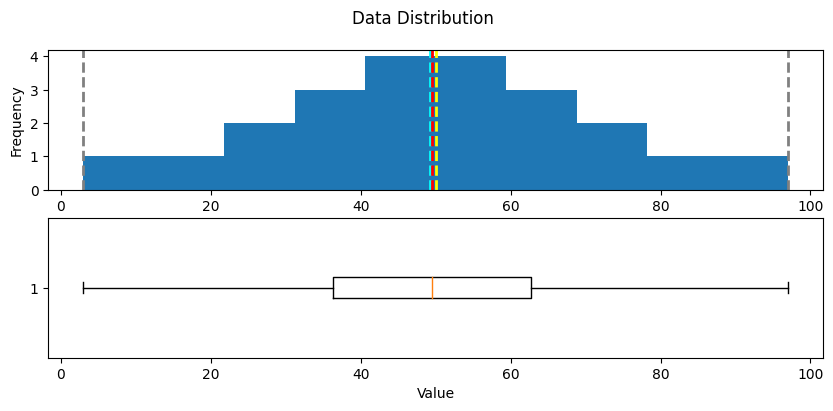

In [21]:

def show_distribution(var_data):

    
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print("Minimo: ", min_val, "\nMassimo: ", max_val, "\nMedia: ", mean_val, "\nMediana: ", med_val, "\nModa: ", mod_val)

    fig, ax = plt.subplots(2, 1, figsize = (10,4))

      
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')

    fig.show()
##
# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)